## Reading of csv file 

In [15]:
import polars as mypl
import pandas as mypd
import numpy as mynp

In [16]:
mydf = mypl.read_csv('E:\my_pythonbook\DataScience\Code_Bundle\Library_Polars\iris.csv')

## Basic operations

In [17]:
mydf.shape # 150 rows and 5 columns

(150, 5)

In [18]:
mydf.head() # # display of first 5 rows
# # we can display any number of rows if we pass any argument to head method

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""
4.9,3.0,1.4,0.2,"""Setosa"""
4.7,3.2,1.3,0.2,"""Setosa"""
4.6,3.1,1.5,0.2,"""Setosa"""
5.0,3.6,1.4,0.2,"""Setosa"""


In [19]:
mydf.head().to_pandas()  # converting the result of head() into a pandas dataframe using to_pandas() function

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [22]:
mydf.dtypes # will return the datatypes of the columns of the dataframe

[Float64, Float64, Float64, Float64, Utf8]

## Selecting and Filtering Data 

In [ ]:
# Note: There are no mydf.loc or mydf.iloc as polars does not have indexes
# Here operations are similiar to select and where commands in sql

### 1. Indexing with [ works 

In [23]:
# display of first row and all the columns
mydf[0,:]

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""Setosa"""


In [25]:
# suppose we want to display first 2 rows of column name sepal.length and petal.length only
mydf[:,['sepal.length','petal.length']].head(2)

sepal.length,petal.length
f64,f64
5.1,1.4
4.9,1.4


In [26]:
# Now suppose we want to filter first 3 rows where petal.length is > 2.1 
mydf.filter(mypl.col('petal.length')>2.1).head(3)

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
7.0,3.2,4.7,1.4,"""Versicolor"""
6.4,3.2,4.5,1.5,"""Versicolor"""
6.9,3.1,4.9,1.5,"""Versicolor"""


### 2. Selecting data with idiomatic polars

In [27]:
mydf.sample(5).to_pandas

<bound method DataFrame.to_pandas of shape: (5, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬────────────┐
│ sepal.length ┆ sepal.width ┆ petal.length ┆ petal.width ┆ variety    │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---        │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str        │
╞══════════════╪═════════════╪══════════════╪═════════════╪════════════╡
│ 6.8          ┆ 2.8         ┆ 4.8          ┆ 1.4         ┆ Versicolor │
│ 4.5          ┆ 2.3         ┆ 1.3          ┆ 0.3         ┆ Setosa     │
│ 5.5          ┆ 2.5         ┆ 4.0          ┆ 1.3         ┆ Versicolor │
│ 6.7          ┆ 3.0         ┆ 5.0          ┆ 1.7         ┆ Versicolor │
│ 6.2          ┆ 2.9         ┆ 4.3          ┆ 1.3         ┆ Versicolor │
└──────────────┴─────────────┴──────────────┴─────────────┴────────────┘>

In [28]:
# Now suppose we want to select sepal.width , petal.width columns and variety columns only and display first 4 rows only
# Using sql select type of operation for just selecting columns
mydf.select(['sepal.width','petal.width','variety']).head(4)

sepal.width,petal.width,variety
f64,f64,str
3.5,0.2,"""Setosa"""
3.0,0.2,"""Setosa"""
3.2,0.2,"""Setosa"""
3.1,0.2,"""Setosa"""


In [30]:
# suppose we want to add a new column name say Mux10_Petal.Length which is 10 * petal.length and display only first 3 rows
mydf.with_columns([
    (mypl.col('petal.length')*10).alias('Mux10_Petal.Length')
    ]).head(3)

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
5.1,3.5,14.0,0.2,"""Setosa"""
4.9,3.0,14.0,0.2,"""Setosa"""
4.7,3.2,13.0,0.2,"""Setosa"""


In [35]:
# suppose we want to display last 5 rows with Setosa variety only
mydf.filter(mypl.col('variety').is_in(['Setosa'])).tail()
# The is_in() function is called on the 'variety' column. The is_in() function checks if the values in the column are present 
# in a given list. In this case, it checks if the 'variety' column values are in the list ['Setosa'].

sepal.length,sepal.width,petal.length,petal.width,variety
f64,f64,f64,f64,str
4.8,3.0,1.4,0.3,"""Setosa"""
5.1,3.8,1.6,0.2,"""Setosa"""
4.6,3.2,1.4,0.2,"""Setosa"""
5.3,3.7,1.5,0.2,"""Setosa"""
5.0,3.3,1.4,0.2,"""Setosa"""


## Computation performing on the select context  

In [37]:
# Calculating the number of unique values in sepal.length column
mydf.select([mypl.col('sepal.length').n_unique()])

sepal.length
u32
35


In [38]:
# Performing statistics on the entire sepal.length column')
mydf.select([
    mypl.col('sepal.length').min().alias('min_sepal_length'),
    mypl.col('sepal.length').mean().alias('mean_sepal_length'),
    mypl.col('sepal.length').median().alias('median_sepal_length'),
    mypl.col('sepal.length').max().alias('max_sepal_length'),
    mypl.col('sepal.length').std().alias('std_sepal_length')
])

min_sepal_length,mean_sepal_length,median_sepal_length,max_sepal_length,std_sepal_length
f64,f64,f64,f64,f64
4.3,5.843333,5.8,7.9,0.828066


In [39]:
# computing statistics at a series level
mydf.select([mypl.col('sepal.length')]).describe()

describe,sepal.length
str,f64
"""count""",150.0
"""null_count""",0.0
"""mean""",5.843333
"""std""",0.828066
"""min""",4.3
"""max""",7.9
"""median""",5.8
"""25%""",5.1
"""75%""",6.4


In [40]:
print('Performing data processing in polars and data visualization in pandas')
mysepal_length = mydf.select([
    mypl.col('sepal.length')
    ]) # data processing


Performing data processing in polars and data visualization in pandas


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000124EF40AE88>]],
      dtype=object)

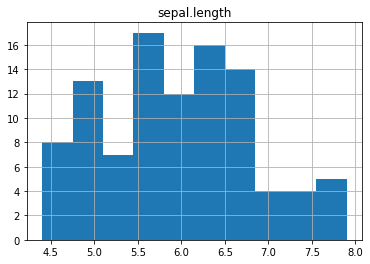

In [41]:
mysepal_length.sample(100).to_pandas().hist(bins=10) # data visualization